In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np

In [80]:
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')

train_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,154,03.06.2011,2.0,0,6,0,5,1,1,24.8000,0.587133,53.12505,0.253121,991,0,898,4414,5312
1,685,15.11.2012,4.0,1,11,0,4,1,2,12.8667,0.324492,93.06255,0.152987,601,0,320,5125,5445
2,368,03.01.2012,1.0,1,1,0,2,1,1,6.0000,0.126275,66.18750,0.365671,549,0,89,2147,2236
3,472,16.04.2012,2.0,1,4,1,1,0,1,26.5667,0.614925,84.25005,0.284829,740,0,1198,5172,6370
4,442,17.03.2012,1.0,1,3,0,-1,0,2,20.5667,0.505046,113.37495,0.110704,773,1,3155,4681,7836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,78,19.03.2011,1.0,0,3,0,6,0,1,18.9000,0.466525,56.87505,0.368167,1022,1,1424,1693,3117
596,81,22.03.2011,NaN,0,3,0,2,1,1,17.6667,0.440642,93.68745,0.225750,551,0,460,2243,2703
597,377,12.01.2012,1.0,1,1,0,4,1,2,15.3000,0.381938,120.43755,0.180967,520,0,269,3828,4097
598,299,26.10.2011,4.0,0,10,0,3,1,2,19.3667,0.472846,108.06255,0.148642,605,0,404,3490,3894


In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          600 non-null    int64  
 1   dteday           600 non-null    object 
 2   season           538 non-null    float64
 3   yr               600 non-null    int64  
 4   mnth             600 non-null    int64  
 5   holiday          600 non-null    int64  
 6   weekday          600 non-null    int64  
 7   workingday       600 non-null    int64  
 8   weathersit       600 non-null    int64  
 9   temp             600 non-null    float64
 10  atemp            600 non-null    float64
 11  hum              566 non-null    float64
 12  windspeed        600 non-null    float64
 13  leaflets         600 non-null    int64  
 14  price reduction  600 non-null    int64  
 15  casual           600 non-null    int64  
 16  registered       600 non-null    int64  
 17  cnt             

In [82]:
from sklearn.impute import SimpleImputer

imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

handled_season = imp_most_freq.fit_transform(train_df['season'].to_numpy().reshape(-1, 1))

handled_season

train_df['season'] = handled_season

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

handled_hum = imp_median.fit_transform(train_df['hum'].to_numpy().reshape(-1, 1))

train_df['hum'] = handled_hum 

In [83]:
train_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,154,03.06.2011,2.0,0,6,0,5,1,1,24.8000,0.587133,53.12505,0.253121,991,0,898,4414,5312
1,685,15.11.2012,4.0,1,11,0,4,1,2,12.8667,0.324492,93.06255,0.152987,601,0,320,5125,5445
2,368,03.01.2012,1.0,1,1,0,2,1,1,6.0000,0.126275,66.18750,0.365671,549,0,89,2147,2236
3,472,16.04.2012,2.0,1,4,1,1,0,1,26.5667,0.614925,84.25005,0.284829,740,0,1198,5172,6370
4,442,17.03.2012,1.0,1,3,0,-1,0,2,20.5667,0.505046,113.37495,0.110704,773,1,3155,4681,7836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,78,19.03.2011,1.0,0,3,0,6,0,1,18.9000,0.466525,56.87505,0.368167,1022,1,1424,1693,3117
596,81,22.03.2011,1.0,0,3,0,2,1,1,17.6667,0.440642,93.68745,0.225750,551,0,460,2243,2703
597,377,12.01.2012,1.0,1,1,0,4,1,2,15.3000,0.381938,120.43755,0.180967,520,0,269,3828,4097
598,299,26.10.2011,4.0,0,10,0,3,1,2,19.3667,0.472846,108.06255,0.148642,605,0,404,3490,3894


In [84]:
train_df['weekday']

0      5
1      4
2      2
3      1
4     -1
      ..
595    6
596    2
597    4
598    3
599    5
Name: weekday, Length: 600, dtype: int64

In [85]:
train_df['weekday'] = pd.to_datetime(train_df['dteday'], format="%d.%M.%Y").dt.dayofweek

train_df['weekday']

0      0
1      6
2      1
3      0
4      1
      ..
595    2
596    5
597    3
598    2
599    2
Name: weekday, Length: 600, dtype: int32

In [86]:
train_df.sort_values('instant')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
90,1,01.01.2011,1.0,0,1,0,5,0,2,13.7667,0.363625,120.87495,0.160446,755,0,331,654,985
303,2,02.01.2011,1.0,0,1,0,6,0,2,14.5391,0.353739,104.41305,0.248539,837,1,131,670,801
213,3,03.01.2011,1.0,0,1,0,0,1,1,7.8546,0.189405,65.59095,0.248309,829,0,120,1229,1349
29,4,04.01.2011,1.0,0,1,0,1,1,1,8.0000,0.212122,88.56525,0.160296,734,0,108,1454,1562
361,5,05.01.2011,1.0,0,1,0,2,1,1,9.0783,0.229270,65.54355,0.186900,745,0,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,726,26.12.2012,1.0,1,12,0,3,1,3,9.7333,0.220333,123.49995,0.316546,701,0,9,432,441
363,727,27.12.2012,1.0,1,12,0,4,1,2,10.1667,0.226642,97.93755,0.350133,561,0,247,1867,2114
299,728,28.12.2012,1.0,1,12,0,5,1,2,10.1333,0.255046,88.50000,0.155471,562,0,644,2451,3095
573,729,29.12.2012,1.0,1,12,0,6,0,2,10.1333,0.242400,112.93755,0.124383,783,0,159,1182,1341


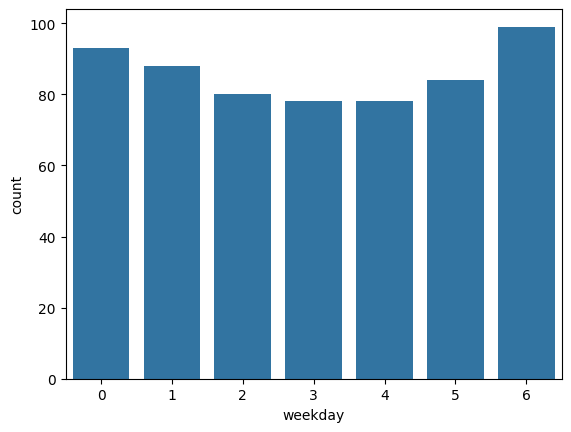

In [87]:
sns.countplot(x='weekday', data=train_df)
plt.show()


In [88]:
train_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
count,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,363.116667,2.288333,0.496667,6.475000,0.03000,3.013333,0.680000,1.401667,19.808284,0.473620,93.811857,0.183696,740.065000,0.150000,1070.895000,3634.116667,4705.011667
std,208.711917,1.136082,0.500406,3.442741,0.17073,2.072917,0.466865,0.542360,7.206843,0.160439,20.765421,0.125257,164.430095,0.357369,2971.316154,1538.698254,3588.750428
min,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,2.365200,0.079070,28.187550,-1.000000,459.000000,0.000000,2.000000,20.000000,22.000000
25%,181.250000,1.000000,0.000000,4.000000,0.00000,1.000000,0.000000,1.000000,13.575000,0.338256,78.359363,0.134335,600.750000,0.000000,313.000000,2499.000000,3135.000000
50%,362.500000,2.000000,0.000000,6.000000,0.00000,3.000000,1.000000,1.000000,20.100000,0.489690,93.256800,0.180971,737.000000,0.000000,722.000000,3657.000000,4530.000000
75%,538.250000,3.000000,1.000000,9.000000,0.00000,5.000000,1.000000,2.000000,26.058300,0.605127,108.437550,0.233947,875.500000,0.000000,1078.000000,4680.250000,5909.500000
max,731.000000,4.000000,1.000000,12.000000,1.00000,6.000000,1.000000,3.000000,34.466700,0.826371,145.875000,0.507463,1032.000000,1.000000,47138.000000,6946.000000,53021.000000


In [89]:
train_df = train_df.astype({'instant': 'float', 'yr':'float', 'mnth':'float', 'holiday':'float', 'weekday':'float', 'workingday':'float', 'weathersit':'float', 'leaflets':'float',  'price reduction':'float',  'casual':'float',  'registered':'float',  'cnt':'float'})


In [90]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          600 non-null    float64
 1   dteday           600 non-null    object 
 2   season           600 non-null    float64
 3   yr               600 non-null    float64
 4   mnth             600 non-null    float64
 5   holiday          600 non-null    float64
 6   weekday          600 non-null    float64
 7   workingday       600 non-null    float64
 8   weathersit       600 non-null    float64
 9   temp             600 non-null    float64
 10  atemp            600 non-null    float64
 11  hum              600 non-null    float64
 12  windspeed        600 non-null    float64
 13  leaflets         600 non-null    float64
 14  price reduction  600 non-null    float64
 15  casual           600 non-null    float64
 16  registered       600 non-null    float64
 17  cnt             

In [1]:
import scipy as stats

def calculateMahalanobis(y=None, data=None, cov=None):
    y_mu = y - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
        inv_covmat = np.linalg.inv(cov)
        left = np.dot(y_mu, inv_covmat)
        mahal = np.dot(left, y_mu.T)
        return mahal.diagonal()
    
train_df['calculateMahalanobis'] = calculateMahalanobis(y=train_df.loc[['holiday', 'hum', 'price redcution', 'casual']], 
                                                  data=train_df.loc[['holiday', 'hum', 'price redcution', 'casual']])

train_df


NameError: name 'train_df' is not defined

In [15]:
import scipy as stats

def calculateMahalanobis(y=None, data=None, cov=None):
    y_mu = y - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
        inv_covmat = np.linalg.inv(cov)
        left = np.dot(y_mu, inv_covmat)
        mahal = np.dot(left, y_mu.T)
        return mahal.diagonal()
    
train_df['calculateMahalanobis'] = calculateMahalanobis(y=train_df.iloc[:, 2:], 
                                                  data=train_df.iloc[:, 2:])

train_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt,calculateMahalanobis
0,154.0,03.06.2011,2.0,0.0,6.0,0.0,0.0,1.0,1.0,24.8000,0.587133,53.12505,0.253121,991.0,0.0,898.0,4414.0,5312.0,-5.908607e+13
1,685.0,15.11.2012,4.0,1.0,11.0,0.0,6.0,1.0,2.0,12.8667,0.324492,93.06255,0.152987,601.0,0.0,320.0,5125.0,5445.0,-5.908607e+13
2,368.0,03.01.2012,1.0,1.0,1.0,0.0,1.0,1.0,1.0,6.0000,0.126275,66.18750,0.365671,549.0,0.0,89.0,2147.0,2236.0,-5.908607e+13
3,472.0,16.04.2012,2.0,1.0,4.0,1.0,0.0,0.0,1.0,26.5667,0.614925,84.25005,0.284829,740.0,0.0,1198.0,5172.0,6370.0,-5.908607e+13
4,442.0,17.03.2012,1.0,1.0,3.0,0.0,1.0,0.0,2.0,20.5667,0.505046,113.37495,0.110704,773.0,1.0,3155.0,4681.0,7836.0,-5.908607e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,78.0,19.03.2011,1.0,0.0,3.0,0.0,2.0,0.0,1.0,18.9000,0.466525,56.87505,0.368167,1022.0,1.0,1424.0,1693.0,3117.0,-5.908607e+13
596,81.0,22.03.2011,1.0,0.0,3.0,0.0,5.0,1.0,1.0,17.6667,0.440642,93.68745,0.225750,551.0,0.0,460.0,2243.0,2703.0,-5.908607e+13
597,377.0,12.01.2012,1.0,1.0,1.0,0.0,3.0,1.0,2.0,15.3000,0.381938,120.43755,0.180967,520.0,0.0,269.0,3828.0,4097.0,-5.908607e+13
598,299.0,26.10.2011,4.0,0.0,10.0,0.0,2.0,1.0,2.0,19.3667,0.472846,108.06255,0.148642,605.0,0.0,404.0,3490.0,3894.0,-5.908607e+13


In [91]:
from scipy import stats


train_df[np.abs(stats.zscore(train_df['casual'])) < 18]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,154.0,03.06.2011,2.0,0.0,6.0,0.0,0.0,1.0,1.0,24.8000,0.587133,53.12505,0.253121,991.0,0.0,898.0,4414.0,5312.0
1,685.0,15.11.2012,4.0,1.0,11.0,0.0,6.0,1.0,2.0,12.8667,0.324492,93.06255,0.152987,601.0,0.0,320.0,5125.0,5445.0
2,368.0,03.01.2012,1.0,1.0,1.0,0.0,1.0,1.0,1.0,6.0000,0.126275,66.18750,0.365671,549.0,0.0,89.0,2147.0,2236.0
3,472.0,16.04.2012,2.0,1.0,4.0,1.0,0.0,0.0,1.0,26.5667,0.614925,84.25005,0.284829,740.0,0.0,1198.0,5172.0,6370.0
4,442.0,17.03.2012,1.0,1.0,3.0,0.0,1.0,0.0,2.0,20.5667,0.505046,113.37495,0.110704,773.0,1.0,3155.0,4681.0,7836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,78.0,19.03.2011,1.0,0.0,3.0,0.0,2.0,0.0,1.0,18.9000,0.466525,56.87505,0.368167,1022.0,1.0,1424.0,1693.0,3117.0
596,81.0,22.03.2011,1.0,0.0,3.0,0.0,5.0,1.0,1.0,17.6667,0.440642,93.68745,0.225750,551.0,0.0,460.0,2243.0,2703.0
597,377.0,12.01.2012,1.0,1.0,1.0,0.0,3.0,1.0,2.0,15.3000,0.381938,120.43755,0.180967,520.0,0.0,269.0,3828.0,4097.0
598,299.0,26.10.2011,4.0,0.0,10.0,0.0,2.0,1.0,2.0,19.3667,0.472846,108.06255,0.148642,605.0,0.0,404.0,3490.0,3894.0


In [92]:
q = train_df["casual"].quantile(0.9)
#q = train_df.iloc[:, 2:].quantile(0.9)
handeled_df = train_df[train_df['casual'] < q]

In [93]:
handeled_df['windspeed'] = handeled_df['windspeed'].drop(handeled_df[handeled_df['windspeed'] < 0].index)
handeled_df.describe()

C:\Users\ruhmt\AppData\Local\Temp\ipykernel_1688\3621548140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  handeled_df['windspeed'] = handeled_df['windspeed'].drop(handeled_df[handeled_df['windspeed'] < 0].index)


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,537.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,348.609259,2.264815,0.459259,6.444444,0.025926,3.009259,0.753704,1.422222,19.286797,0.461773,94.123913,0.194237,741.827778,0.148148,671.685185,3566.579630,4238.264815
std,209.626245,1.156679,0.498799,3.550153,0.159062,2.057140,0.431253,0.551156,7.274659,0.162204,21.088254,0.080906,163.919790,0.355576,448.949002,1582.417387,1840.971545
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.365200,0.079070,28.187550,0.022392,459.000000,0.000000,2.000000,20.000000,22.000000
25%,165.750000,1.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1.000000,13.027150,0.324482,78.359363,0.135571,602.000000,0.000000,268.750000,2410.000000,2908.500000
50%,337.500000,2.000000,0.000000,6.000000,0.000000,3.000000,1.000000,1.000000,18.766700,0.461160,93.256800,0.183471,739.000000,0.000000,653.000000,3577.000000,4298.000000
75%,522.250000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,25.583350,0.597865,109.343738,0.237562,878.750000,0.000000,968.000000,4606.500000,5320.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,34.466700,0.826371,145.875000,0.507463,1032.000000,1.000000,1914.000000,6946.000000,8173.000000


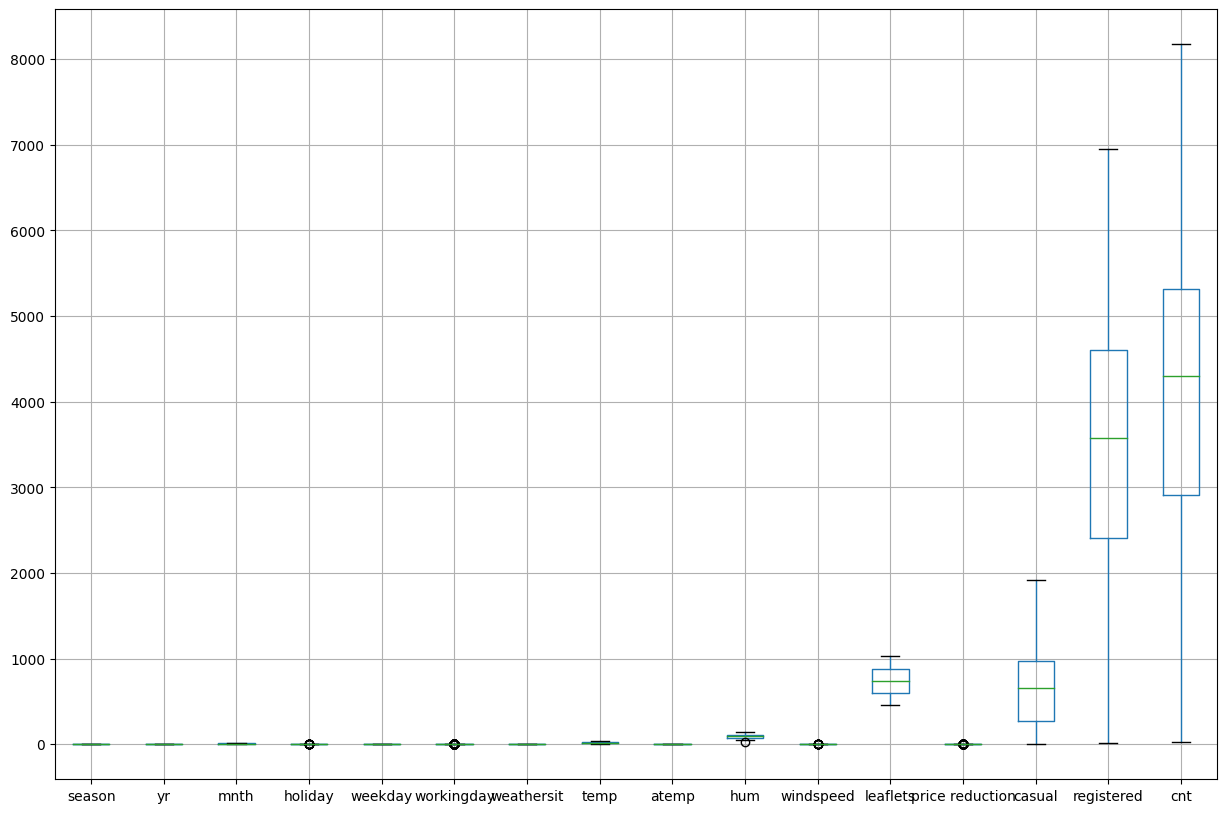

In [94]:
boxplot = handeled_df.iloc[:, 1:].boxplot(figsize=(15, 10))
plt.show()

In [95]:
handeled_df[['holiday', 'workingday', 'hum', 'windspeed', 'price reduction']].describe()

,holiday,workingday,hum,windspeed,price reduction
count,540.000000,540.000000,540.000000,537.000000,540.000000
mean,0.025926,0.753704,94.123913,0.194237,0.148148
std,0.159062,0.431253,21.088254,0.080906,0.355576
min,0.000000,0.000000,28.187550,0.022392,0.000000
25%,0.000000,1.000000,78.359363,0.135571,0.000000
50%,0.000000,1.000000,93.256800,0.183471,0.000000
75%,0.000000,1.000000,109.343738,0.237562,0.000000
max,1.000000,1.000000,145.875000,0.507463,1.000000


In [99]:
#q = train_df["windspeed"].quantile(0.001)
#print(q)
#q = train_df.iloc[:, 2:].quantile(0.9)
#handeled_df = train_df[train_df['casual'] < q]

-1.0
